In [1]:
# api 요청
import requests
import json
# 데이터 자료형 및 분석도구
import pandas as pd
import numpy as np
import seaborn as sns
# 시간
import time
# 진행 사항 확인
from tqdm import tqdm

# 시각화 패키지
import matplotlib as mlp
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import patheffects
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as mtick
%matplotlib inline
import koreanize_matplotlib

In [2]:
a = pd.read_csv('heal_boost_data.csv')
b = pd.read_csv('heal.csv')
c = pd.read_csv('Throwable_data.csv')

In [3]:
a.head()

,character_name,Item_Heal_MedKit,match_id,Item_Heal_FirstAid_C,Item_Heal_Bandage_C,Item_Boost_AdrenalineSyringe_C,Item_Boost_PainKiller_C,Item_Boost_EnergyDrink_C,Item_Weapon_Molotov_C,Item_Weapon_SmokeBomb_C,Item_Weapon_FlashBang_C,Item_Weapon_Grenade_C
0,17_Lilghost,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17_SuJiu,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17_Xbei,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17_xwudd,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4AM_CRAZY112,1.0,1,7.0,1.0,1.0,3.0,2.0,1.0,6.0,3.0,3.0


In [4]:
b.head()

,character_name,Item_Heal_MedKit,match_id,Item_Heal_FirstAid_C,Item_Heal_Bandage_C,Item_Boost_AdrenalineSyringe_C,Item_Boost_PainKiller_C,Item_Boost_EnergyDrink_C
0,17_Lilghost,NaN,1,NaN,NaN,NaN,NaN,NaN
1,17_SuJiu,NaN,1,NaN,NaN,NaN,NaN,NaN
2,17_Xbei,NaN,1,NaN,NaN,NaN,NaN,NaN
3,17_xwudd,NaN,1,NaN,NaN,NaN,NaN,NaN
4,4AM_CRAZY112,1.0,1,NaN,2.0,1.0,2.0,1.0


In [5]:
c.head()

,attacker_name,Item_Weapon_Molotov_C,match_id,Item_Weapon_SmokeBomb_C,Item_Weapon_Grenade_C,Item_Weapon_FlashBang_C
0,17_Lilghost,NaN,1,NaN,NaN,NaN
1,17_SuJiu,NaN,1,NaN,NaN,NaN
2,17_Xbei,NaN,1,NaN,NaN,NaN
3,17_xwudd,NaN,1,NaN,NaN,NaN
4,4AM_CRAZY112,1.0,1,5.0,3.0,3.0


In [6]:
a=a.drop("match_id", axis = 1)
b=b.drop("match_id", axis = 1)
c=c.drop("match_id", axis = 1)

In [7]:
a = a.rename(columns = {"Item_Heal_MedKit" : "의료용 키트","Item_Heal_FirstAid_C":"구급 상자","Item_Heal_Bandage_C":"붕대","Item_Boost_AdrenalineSyringe_C":"아드레날린 주사기","Item_Boost_PainKiller_C":"진통제","Item_Boost_EnergyDrink_C":"에너지 드링크","Item_Weapon_Molotov_C":"화염병","Item_Weapon_SmokeBomb_C":"연막탄","Item_Weapon_FlashBang_C":"섬광탄","Item_Weapon_Grenade_C":"수류탄"})
b = b.rename(columns = {"Item_Heal_MedKit" : "의료용 키트","Item_Heal_FirstAid_C":"구급 상자","Item_Heal_Bandage_C":"붕대","Item_Boost_AdrenalineSyringe_C":"아드레날린 주사기","Item_Boost_PainKiller_C":"진통제","Item_Boost_EnergyDrink_C":"에너지 드링크"})
c = c.rename(columns = {"Item_Weapon_Molotov_C":"화염병","Item_Weapon_SmokeBomb_C":"연막탄","Item_Weapon_FlashBang_C":"섬광탄","Item_Weapon_Grenade_C":"수류탄"})

In [8]:
aa = a
bb = b
cc = c
a=a.sum()
b=b.sum()
c=c.sum()

In [9]:
a=pd.DataFrame(a)
a=a.reset_index()
b=pd.DataFrame(b)
b=b.reset_index()
c=pd.DataFrame(c)
c=c.reset_index()

In [10]:
a = a.rename(columns = {0 : "get_item"})
b = b.rename(columns = {0 : "use_heal"})
c = c.rename(columns = {0 : "use_throw"})

In [12]:
ab = a.iloc[1:7]
ac = a.iloc[7:]
b = b.iloc[1:]
c = c.iloc[1:]

In [13]:
ab = pd.merge(ab, b, on='index', how='outer')
ac = pd.merge(ac, c, on='index', how='outer')

In [14]:
ab = ab.rename(columns = {"index" : "heal"})
ac = ac.rename(columns = {"index" : "throw"})

In [15]:
ab["use_rate"] = ab["use_heal"]/ab["get_item"] * 100
ac["use_rate"] = ac["use_throw"]/ac["get_item"] * 100

In [16]:
ab['use_rate'] = ab['use_rate'].astype(float)
ac['use_rate'] = ac['use_rate'].astype(float)

In [17]:
ab['use_rate'] = ab['use_rate'].round(1)
ac['use_rate'] = ac['use_rate'].round(1)

In [18]:
ab = ab.rename(columns = {'heal':"회복아이템", 'get_item':"얻은 아이템", 'use_heal':"사용한 회복템", 'use_rate':"아이템 사용률"})
ac = ac.rename(columns = {'throw':"투척 무기", 'get_item':"얻은 아이템", 'use_throw':"사용한 투척 무기", 'use_rate':"아이템 사용률"})

<AxesSubplot:xlabel='회복아이템', ylabel='얻은 아이템'>

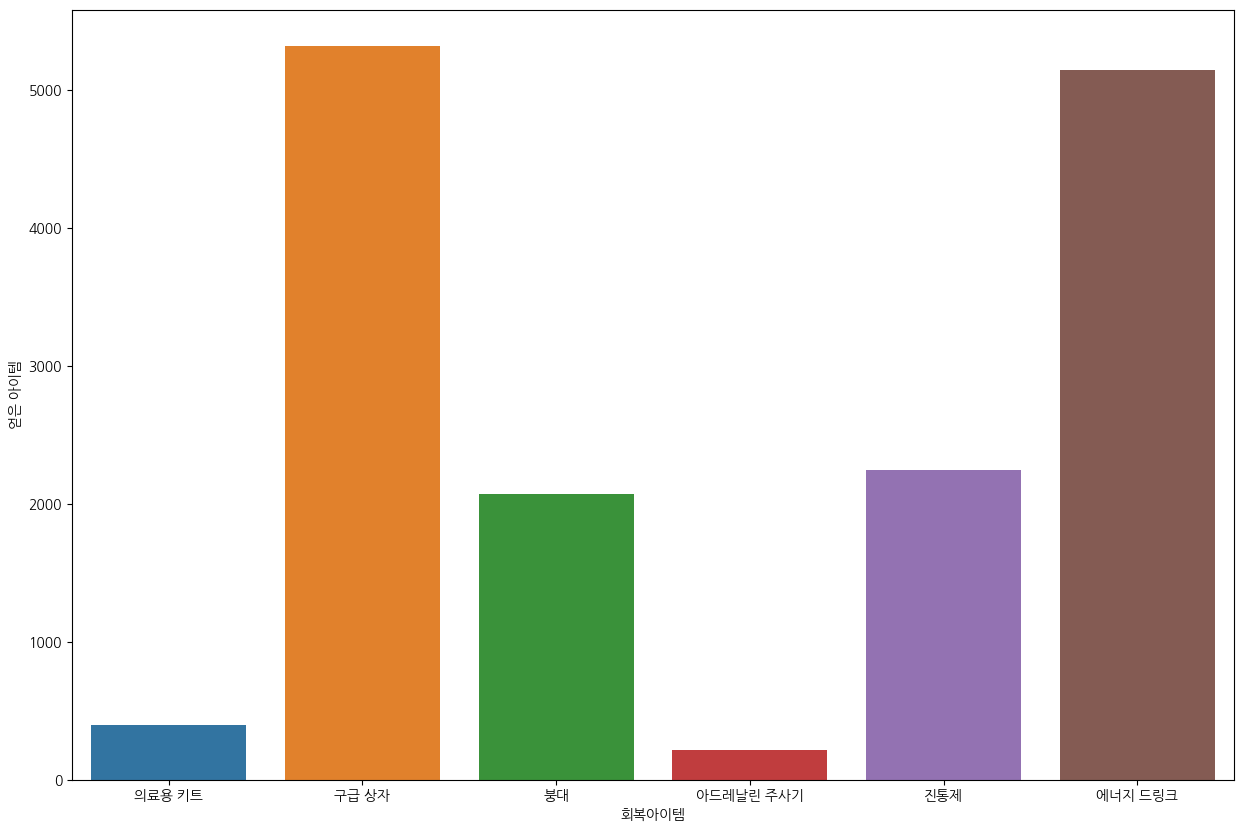

In [19]:
plt.figure(figsize = (15,10))
sns.barplot(data = ab, x = "회복아이템",y = "얻은 아이템")

<AxesSubplot:xlabel='회복아이템', ylabel='사용한 회복템'>

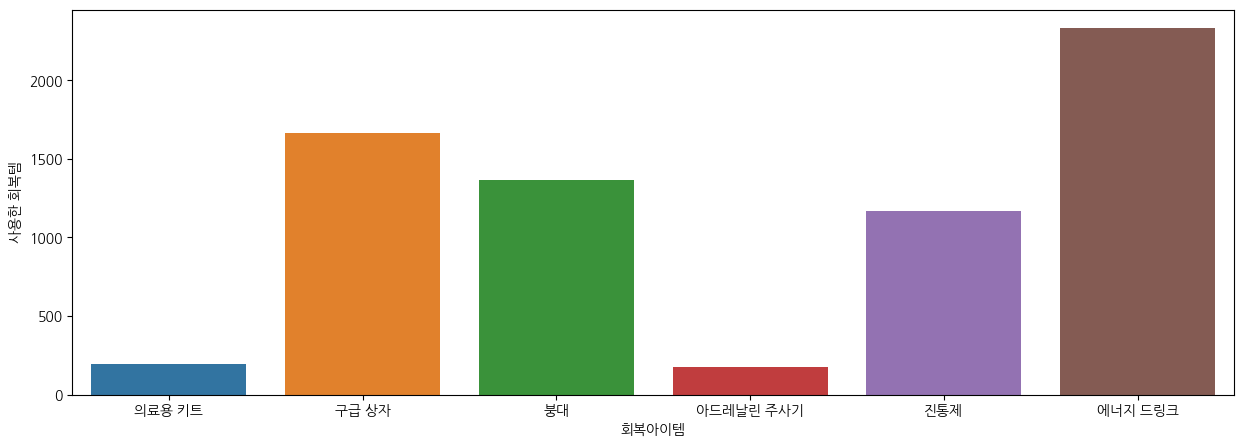

In [20]:
plt.figure(figsize = (15,5))
sns.barplot(data = ab, x = "회복아이템",y = "사용한 회복템")

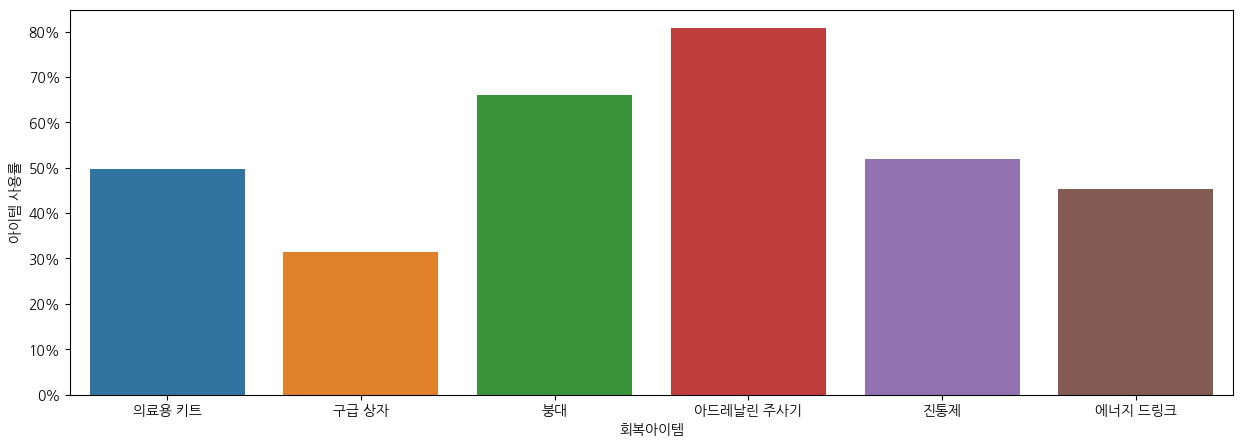

In [21]:
plt.figure(figsize = (15,5))
r = sns.barplot(data = ab, x = "회복아이템",y = "아이템 사용률")
r.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

<AxesSubplot:xlabel='투척 무기', ylabel='얻은 아이템'>

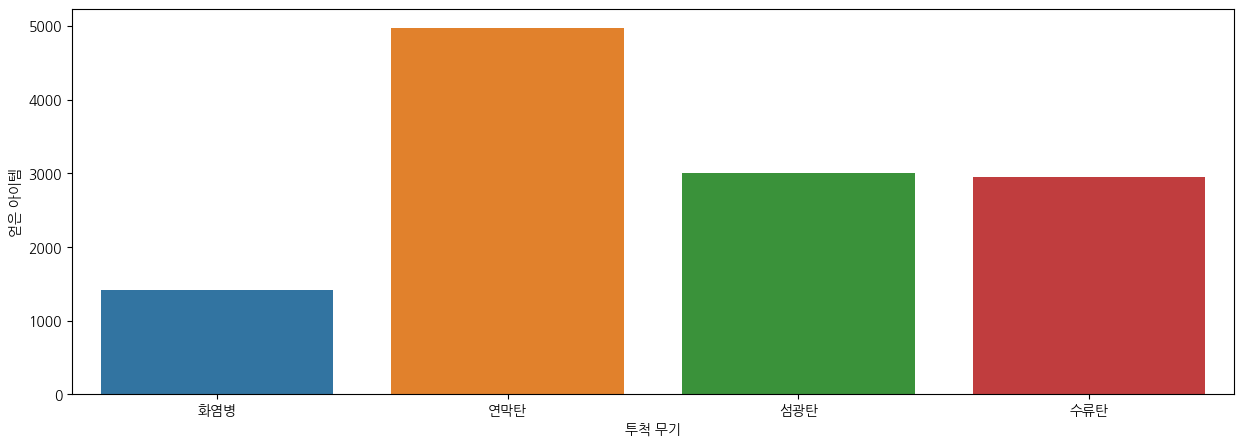

In [22]:
plt.figure(figsize = (15,5))
sns.barplot(data = ac, x = "투척 무기",y = "얻은 아이템")

<AxesSubplot:xlabel='투척 무기', ylabel='사용한 투척 무기'>

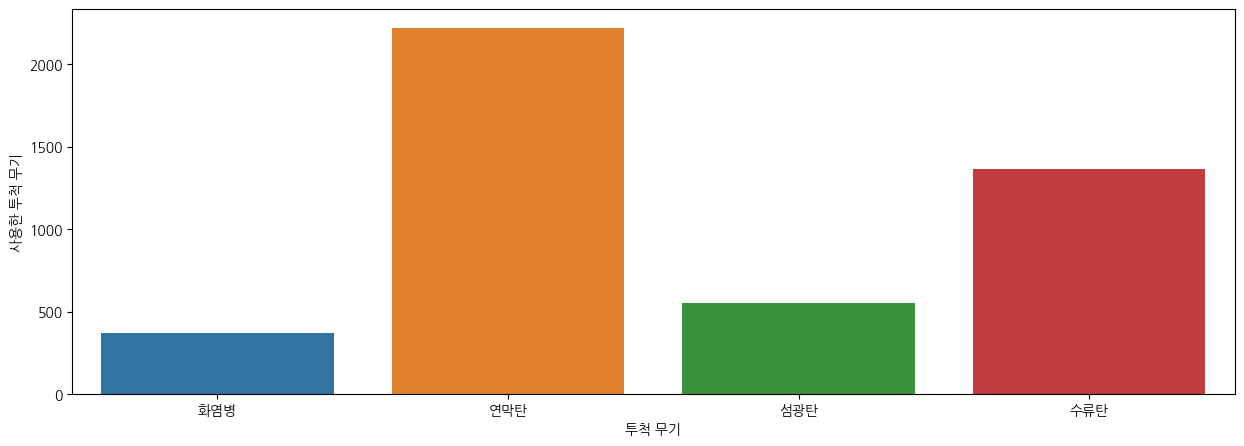

In [23]:
plt.figure(figsize = (15,5))
sns.barplot(data = ac, x = "투척 무기",y = "사용한 투척 무기")

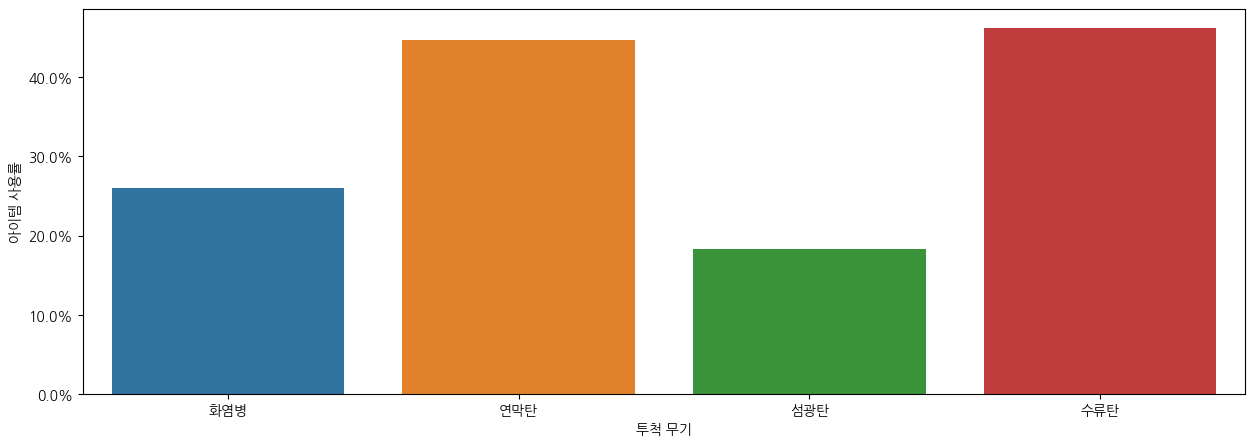

In [24]:
plt.figure(figsize = (15,5))
r = sns.barplot(data = ac, x = "투척 무기",y = "아이템 사용률")
r.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [25]:
aa[[ 'team','column_name_1']] = aa['character_name'].str.split('_', expand=True)
aa = aa.drop(["column_name_1"],axis = 1)
aa = aa.groupby("team").sum()
aa = aa.T
aa = aa.reset_index()
bb[[ 'team','column_name_1']] = bb['character_name'].str.split('_', expand=True)
bb = bb.drop(["column_name_1"],axis = 1)
bb = bb.groupby("team").sum()
bb = bb.T
bb = bb.reset_index()
cc[[ 'team','column_name_1']] = cc['attacker_name'].str.split('_', expand=True)
cc = cc.drop(["column_name_1"],axis = 1)
cc = cc.groupby("team").sum()
cc = cc.T
cc = cc.reset_index()
aab = aa.iloc[:6]
aac = aa.iloc[6:]
aab = aab.rename(columns = {"index" : "회복템"})
aac = aac.rename(columns = {"index" : "투척 무기"})
bb = bb.rename(columns = {"index" : "사용한 회복템"})
cc = cc.rename(columns = {"index" : "사용한 투척 무기"})
aac = aac.reset_index(drop=True)
e = pd.concat([aab.iloc[:,:1],bb/aab], axis=1).iloc[:,:-2]
f = pd.concat([aac.iloc[:,:1],cc/aac], axis=1).iloc[:,:-2]

C:\Users\rlarj\AppData\Local\Temp\ipykernel_8052\359072135.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aa = aa.groupby("team").sum()
C:\Users\rlarj\AppData\Local\Temp\ipykernel_8052\359072135.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bb = bb.groupby("team").sum()
C:\Users\rlarj\AppData\Local\Temp\ipykernel_8052\359072135.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cc = cc.groupby("team").sum()


In [29]:
team_name = "원하는 팀이름"

In [30]:
A = aab.sort_values(team_name, ascending=False)
B = aac.sort_values(team_name, ascending=False)
C = bb.sort_values(team_name, ascending=False)
D = cc.sort_values(team_name, ascending=False)
E = e.sort_values(team_name, ascending=False)
F = f.sort_values(team_name, ascending=False)

<AxesSubplot:xlabel='GEN', ylabel='회복템'>

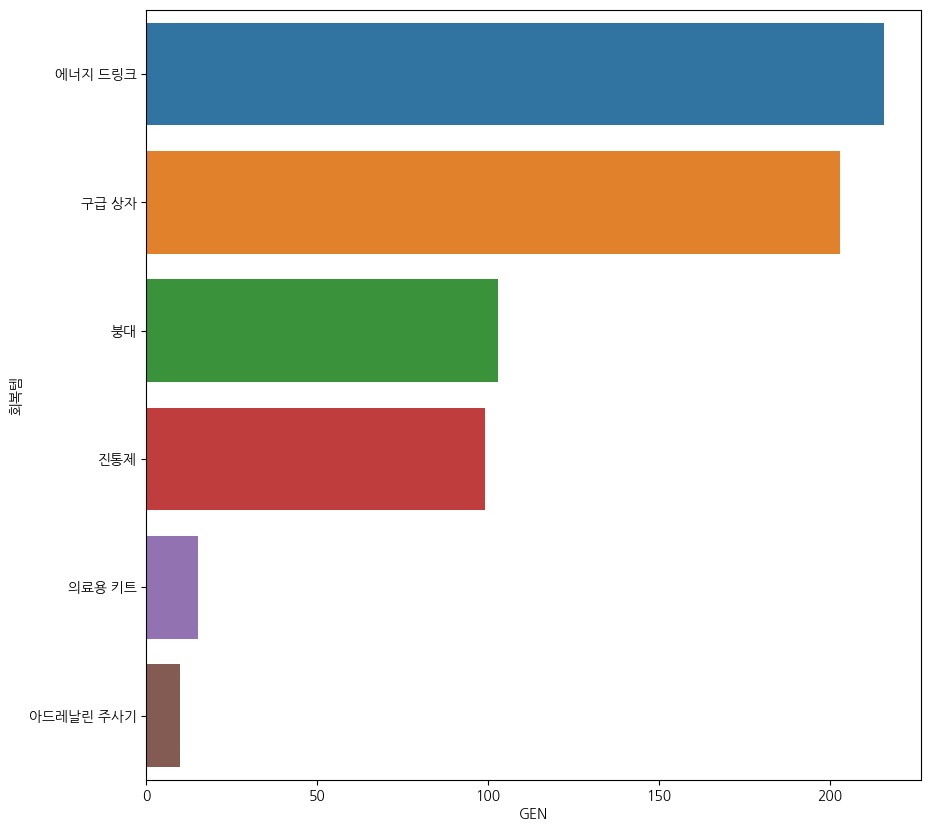

In [31]:
plt.figure(figsize = (10,10))
sns.barplot(data = A, x = team_name, y = "회복템")

<AxesSubplot:xlabel='GEN', ylabel='투척 무기'>

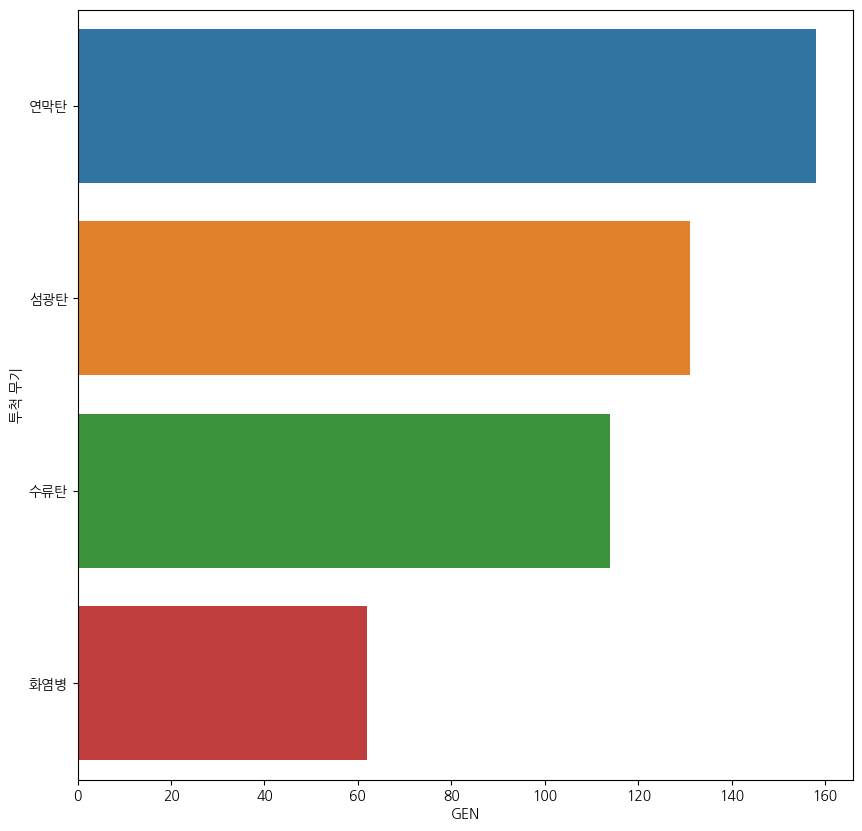

In [32]:
plt.figure(figsize = (10,10))
sns.barplot(data = B, x = team_name, y = "투척 무기")

<AxesSubplot:xlabel='GEN', ylabel='사용한 회복템'>

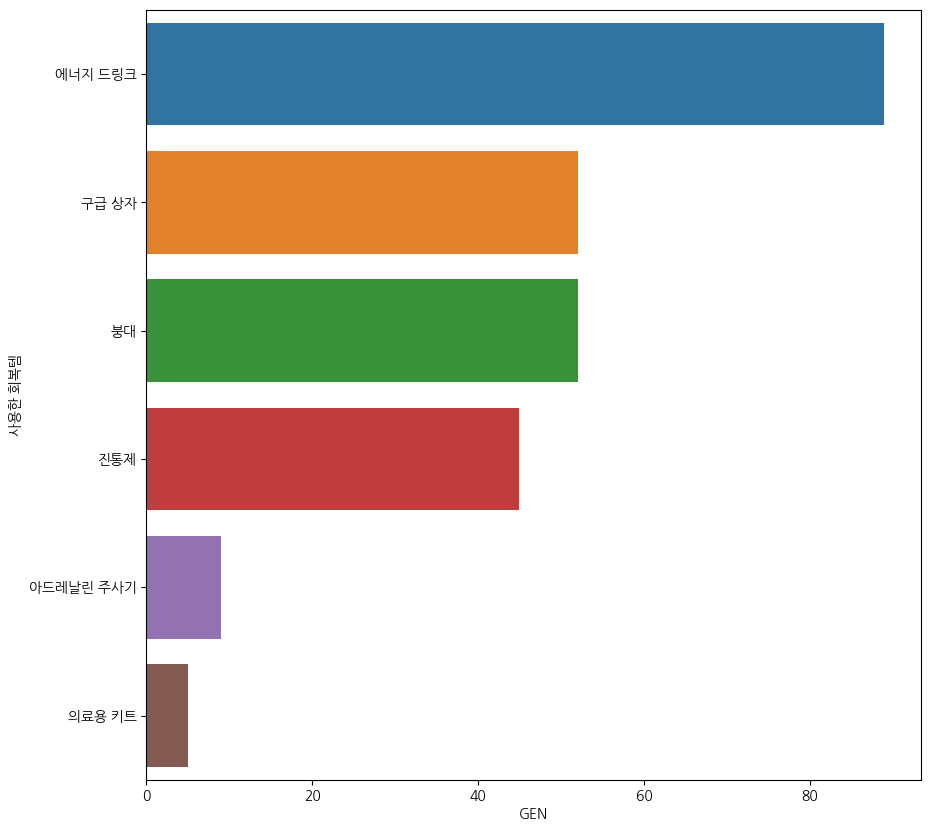

In [33]:
plt.figure(figsize = (10,10))
sns.barplot(data = C, x = team_name, y = "사용한 회복템")

<AxesSubplot:xlabel='GEN', ylabel='사용한 투척 무기'>

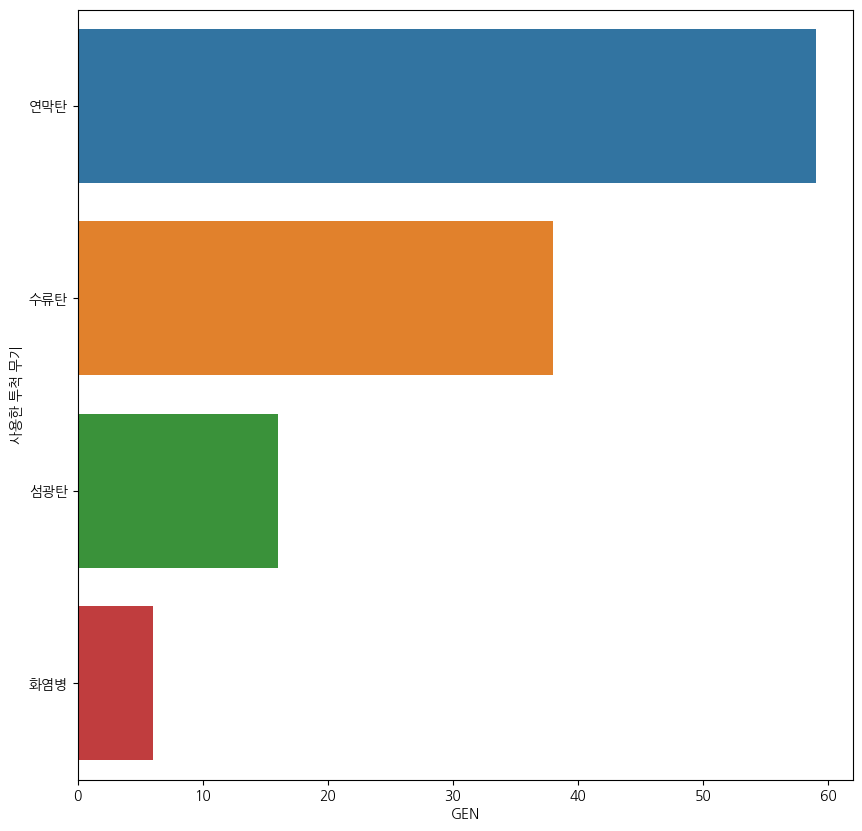

In [34]:
plt.figure(figsize = (10,10))
sns.barplot(data = D, x = team_name, y = "사용한 투척 무기")

<AxesSubplot:xlabel='GEN', ylabel='회복템'>

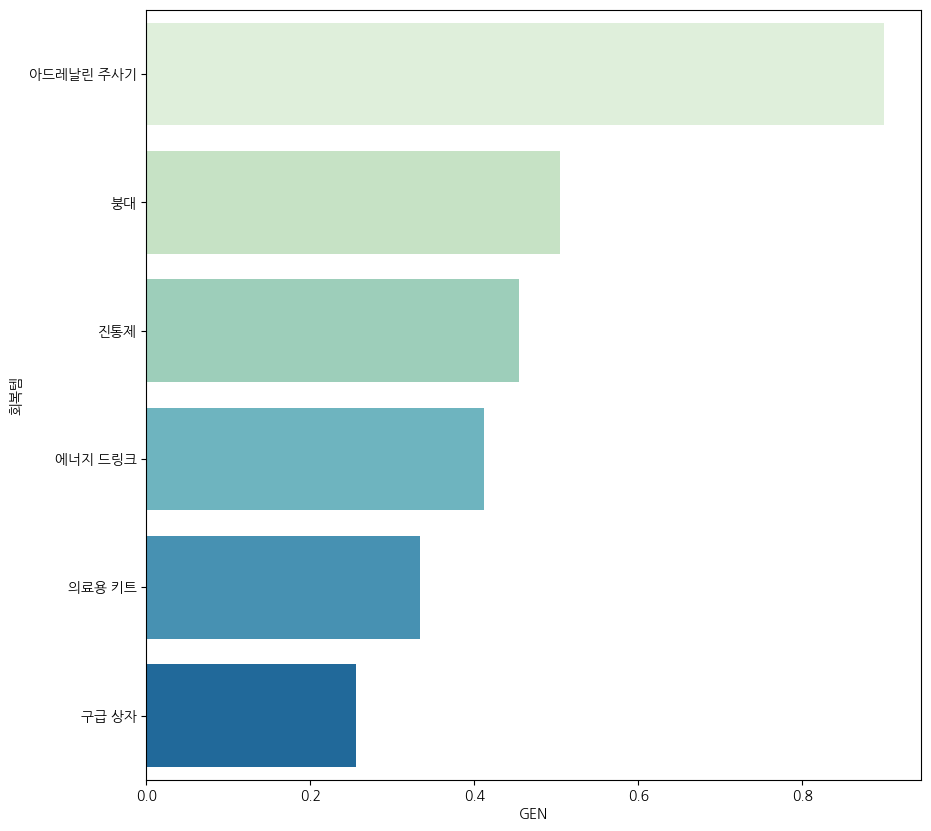

In [35]:
plt.figure(figsize = (10,10))
sns.barplot(data = E, x = team_name, y = "회복템",palette='GnBu')

<AxesSubplot:xlabel='GEN', ylabel='투척 무기'>

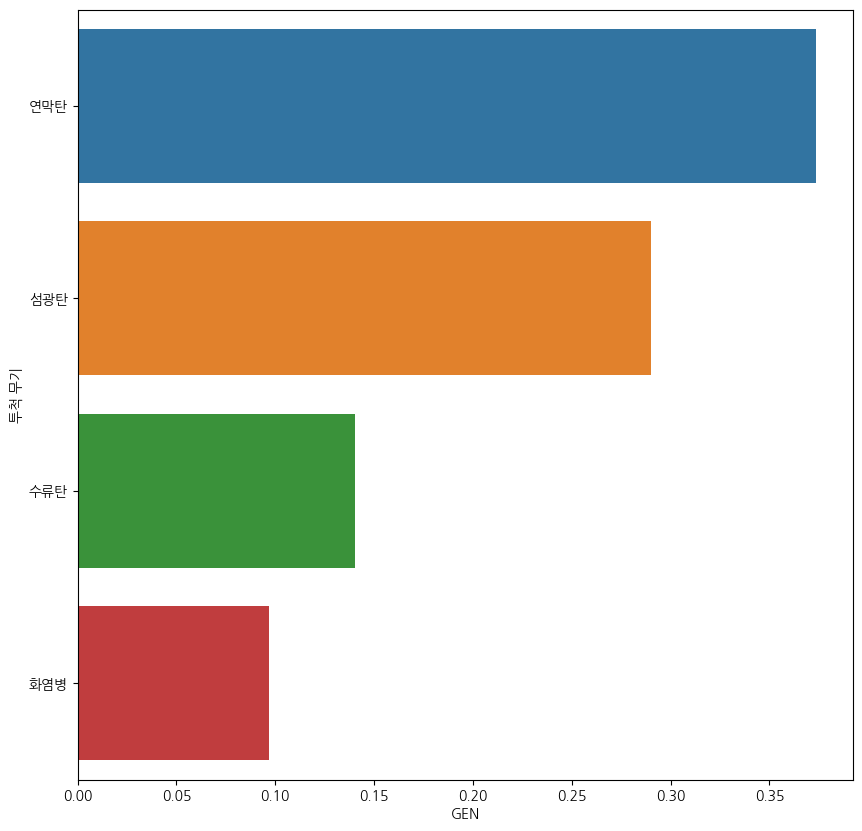

In [36]:
plt.figure(figsize = (10,10))
sns.barplot(data = F, x = team_name, y = "투척 무기")